In [264]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
import datetime as dt

In [276]:
df_original = pd.read_csv('data.csv')
df_original = df_original.sample(frac=0.1)
df_original.head()

,date,count,week,hour,minute,hour_half,special_day,test_season,vacation
118473,2018-06-05 13:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137355,2018-06-21 21:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76794,2018-04-29 17:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150787,2018-04-17 15:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13168,2018-04-28 16:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
df_original = df_original.sort_index()

In [267]:
from dateutil.parser import parse
df_original.date = df_original.date.apply(lambda x : parse(x))
df_original.head()

,date,count,week,hour,minute,hour_half,special_day,test_season,vacation
3,2018-04-01 09:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-04-01 09:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2018-04-01 09:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2018-04-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,2018-04-01 10:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
df_original.date.head()

3    2018-04-01 09:54:00
6    2018-04-01 09:54:00
11   2018-04-01 09:59:00
15   2018-04-01 10:00:00
33   2018-04-01 10:05:00
Name: date, dtype: datetime64[ns]

jupyter 에서는 10% 데이터만 가지고 실험

In [271]:
df_original.week = df_original.date.apply(lambda x : x.strftime("week_%A"))
df_original.head()

,date,count,week,hour,minute,hour_half,special_day,test_season,vacation
3,2018-04-01 09:54:00,NaN,week_Sunday,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-04-01 09:54:00,NaN,week_Sunday,NaN,NaN,NaN,NaN,NaN,NaN
11,2018-04-01 09:59:00,NaN,week_Sunday,NaN,NaN,NaN,NaN,NaN,NaN
15,2018-04-01 10:00:00,NaN,week_Sunday,NaN,NaN,NaN,NaN,NaN,NaN
33,2018-04-01 10:05:00,NaN,week_Sunday,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
df_original.hour = df_original.date.apply(lambda x : x.strftime("%H"))
df_original.minute = df_original.date.apply(lambda x: x.strftime("%M"))
df_original.head()

df_original.hour = df_original.hour.astype('int')
df_original.minute=  df_original.minute.astype('int')

In [273]:
range0 = []
range1 = []

range30 = []
for i in range(0,30,1) :
    range30.append(i)
    range0.append(0)

range60 = []
for i in range(30,60,1) :
    range60.append(i)
    range1.append(1)

df_original.minute = df_original.minute.replace(range30, range0)
df_original.minute = df_original.minute.replace(range60, range1)
df_original.head()

,date,count,week,hour,minute,hour_half,special_day,test_season,vacation
3,2018-04-01 09:54:00,NaN,week_Sunday,9,1,NaN,NaN,NaN,NaN
6,2018-04-01 09:54:00,NaN,week_Sunday,9,1,NaN,NaN,NaN,NaN
11,2018-04-01 09:59:00,NaN,week_Sunday,9,1,NaN,NaN,NaN,NaN
15,2018-04-01 10:00:00,NaN,week_Sunday,10,0,NaN,NaN,NaN,NaN
33,2018-04-01 10:05:00,NaN,week_Sunday,10,0,NaN,NaN,NaN,NaN


In [274]:
df_original.hour_half = df_original.loc[df_original.minute == 1].hour.apply(lambda a : a + 0.5)
df_original.hour_half.loc[df_original.minute == 0] = df_original.loc[df_original.minute == 0 ].hour.apply(lambda x : x)
df_original.head(10)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,date,count,week,hour,minute,hour_half,special_day,test_season,vacation
3,2018-04-01 09:54:00,NaN,week_Sunday,9,1,9.5,NaN,NaN,NaN
6,2018-04-01 09:54:00,NaN,week_Sunday,9,1,9.5,NaN,NaN,NaN
11,2018-04-01 09:59:00,NaN,week_Sunday,9,1,9.5,NaN,NaN,NaN
15,2018-04-01 10:00:00,NaN,week_Sunday,10,0,10.0,NaN,NaN,NaN
33,2018-04-01 10:05:00,NaN,week_Sunday,10,0,10.0,NaN,NaN,NaN
40,2018-04-01 10:13:00,NaN,week_Sunday,10,0,10.0,NaN,NaN,NaN
51,2018-04-01 10:21:00,NaN,week_Sunday,10,0,10.0,NaN,NaN,NaN
56,2018-04-01 10:22:00,NaN,week_Sunday,10,0,10.0,NaN,NaN,NaN
66,2018-04-01 10:31:00,NaN,week_Sunday,10,1,10.5,NaN,NaN,NaN
77,2018-04-01 10:44:00,NaN,week_Sunday,10,1,10.5,NaN,NaN,NaN


In [275]:
import random
df_original['count'] = df_original['count'].apply(lambda x  : random.randint(1, 4))

df_original.head()



,date,count,week,hour,minute,hour_half,special_day,test_season,vacation
3,2018-04-01 09:54:00,3,week_Sunday,9,1,9.5,NaN,NaN,NaN
6,2018-04-01 09:54:00,1,week_Sunday,9,1,9.5,NaN,NaN,NaN
11,2018-04-01 09:59:00,1,week_Sunday,9,1,9.5,NaN,NaN,NaN
15,2018-04-01 10:00:00,3,week_Sunday,10,0,10.0,NaN,NaN,NaN
33,2018-04-01 10:05:00,3,week_Sunday,10,0,10.0,NaN,NaN,NaN


# Dummy 변수 만들기

In [243]:
df_original_with_dummies = pd.concat([df_original, pd.get_dummies(df_original.week)], axis = 1)

In [244]:
df_original_with_dummies = pd.concat([df_original_with_dummies, pd.get_dummies(df_original.hour_half)], axis= 1)

In [245]:
df_original_with_dummies.columns

Index([          'date',           'week',           'hour',         'minute',
            'hour_half',    'special_day',    'test_season',       'vacation',
          'week_Friday',    'week_Monday',  'week_Saturday',    'week_Sunday',
        'week_Thursday',   'week_Tuesday', 'week_Wednesday',              0.0,
                    8.0,              8.5,              9.0,              9.5,
                   10.0,             10.5,             11.0,             11.5,
                   12.0,             12.5,             13.0,             13.5,
                   14.0,             14.5,             15.0,             15.5,
                   16.0,             16.5,             17.0,             17.5,
                   18.0,             18.5,             19.0,             19.5,
                   20.0,             20.5,             21.0,             21.5,
                   22.0,             22.5,             23.0,             23.5],
      dtype='object')

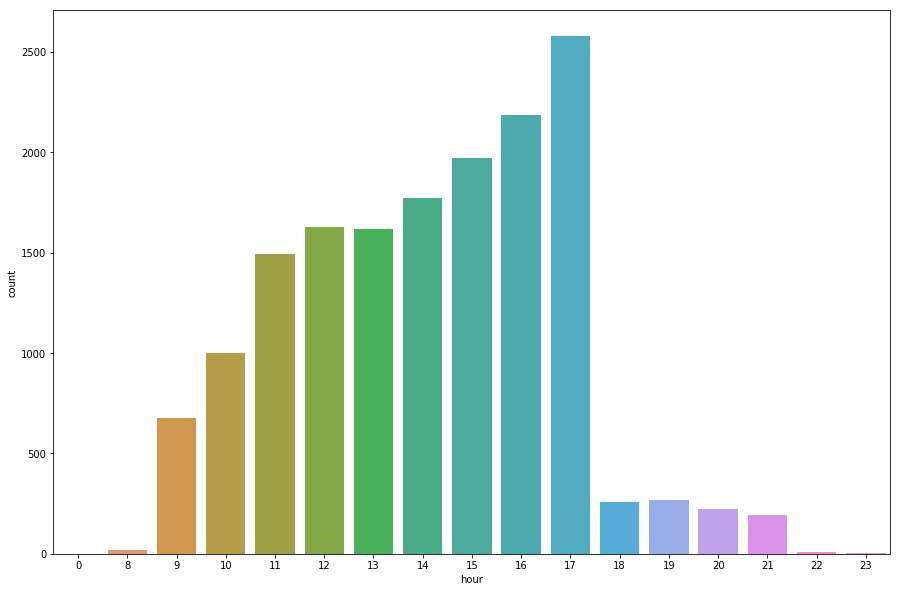

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

figure = plt.figure(figsize = [15, 10])
sns.countplot(df_original.hour)